In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Open and explore data

legdp_data = pd.read_csv("all_data.csv")
legdp_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
# Further explore data

print(legdp_data.info())
print(legdp_data.Country.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


In [8]:
# Initial summary statistics values

print(legdp_data.describe(include = "all"))

       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min        NaN  2000.000000                         44.300000  4.415703e+09
25%        NaN  2003.750000                         74.475000  1.733018e+11
50%        NaN  2007.500000                         76.750000  1.280220e+12
75%        NaN  2011.250000                         78.900000  4.067510e+12
max        NaN  2015.000000                         81.000000  1.810000e+13


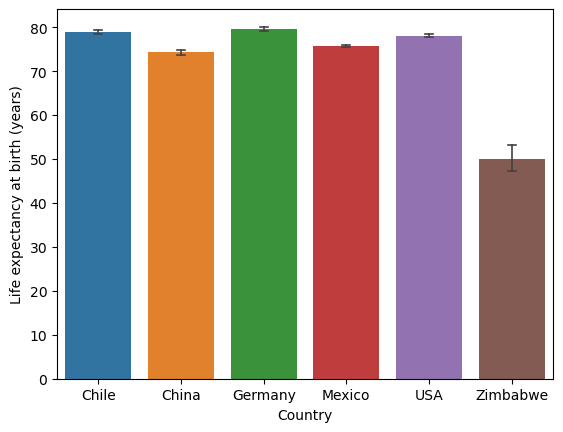

In [27]:
# Barplot of Country and Life Expectancy at birth

ax = sns.barplot(data = legdp_data, x = "Country", y = "Life expectancy at birth (years)", capsize=0.1, errwidth = 1.2)
plt.xticks(rotation = 3<0)
ax.set_xticklabels(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"])
plt.show()